In [14]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import load_model


In [115]:
con=sqlite3.connect('./FPA_FOD_20170508.sqlite')

df = pd.read_sql_query("SELECT * From Fires", con)


In [116]:
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
#print(cursor.fetchall())
cursor.close()
con.close()

In [ ]:
def to_csv():
    con=sqlite3.connect('./FPA_FOD_20170508.sqlite')

    cursor = con.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    for table_name in tables:
        table_name = table_name[0]
        #if (table_name != 'SpatialIndex' and table_name != 'ElementaryGeometries' and table_name != 'KNN') :
        if (table_name == 'Fires'):
            table = pd.read_sql_query("SELECT * From {}".format(table_name), con)
            table.to_csv(table_name + '.csv', index_label='index')
    cursor.close()
    con.close()

In [ ]:
to_csv()

In [117]:
# Remove unwanted cols
df = df.drop(['OBJECTID','STATE', 'COUNTY','FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE_CLASS', 'OWNER_CODE', 'OWNER_DESCR',
       'FIPS_CODE', 'FIPS_NAME', 'DISCOVERY_TIME','Shape'], axis=1)
#'FIRE_YEAR'
#'DISCOVERY_TIME'

In [118]:
print(df.columns)
df.head(n=10)

Index(['FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE',
       'FIRE_SIZE', 'LATITUDE', 'LONGITUDE'],
      dtype='object')


,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,FIRE_SIZE,LATITUDE,LONGITUDE
0,2005,2453403.5,33,9.0,0.10,40.036944,-121.005833
1,2004,2453137.5,133,1.0,0.25,38.933056,-120.404444
2,2004,2453156.5,152,5.0,0.10,38.984167,-120.735556
3,2004,2453184.5,180,1.0,0.10,38.559167,-119.913333
4,2004,2453184.5,180,1.0,0.10,38.559167,-119.933056
5,2004,2453186.5,182,1.0,0.10,38.635278,-120.103611
6,2004,2453187.5,183,1.0,0.10,38.688333,-120.153333
7,2005,2453437.5,67,5.0,0.80,40.968056,-122.433889
8,2005,2453444.5,74,5.0,1.00,41.233611,-122.283333
9,2004,2453187.5,183,1.0,0.10,38.548333,-120.149167


In [119]:
# Check for Nan values
df.isnull().values.any()
df1 = df[df.isna().any(axis=1)]
print(df1)

Empty DataFrame
Columns: [FIRE_YEAR, DISCOVERY_DATE, DISCOVERY_DOY, STAT_CAUSE_CODE, FIRE_SIZE, LATITUDE, LONGITUDE]
Index: []


In [121]:
#Changing pandas dataframe to numpy array
Y = df.iloc[:,4:5].values
X = np.concatenate( (df.iloc[:,:4].values, df.iloc[:,5:].values), axis = 1 )
print(Y[0:3])
print(X[0:3,:])


[[0.1 ]
 [0.25]
 [0.1 ]]
[[ 2.00500000e+03  2.45340350e+06  3.30000000e+01  9.00000000e+00
   4.00369444e+01 -1.21005833e+02]
 [ 2.00400000e+03  2.45313750e+06  1.33000000e+02  1.00000000e+00
   3.89330556e+01 -1.20404444e+02]
 [ 2.00400000e+03  2.45315650e+06  1.52000000e+02  5.00000000e+00
   3.89841667e+01 -1.20735556e+02]]


In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
def MAPE(y_true,y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Coefficients: [[2226.977452     -6.08870239    5.89829544   -9.34697444   11.14277886
    -4.39688737]]


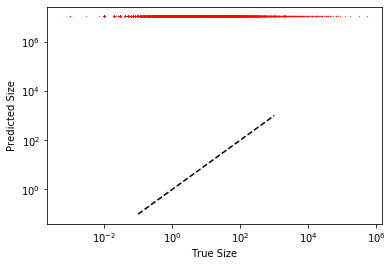

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y)

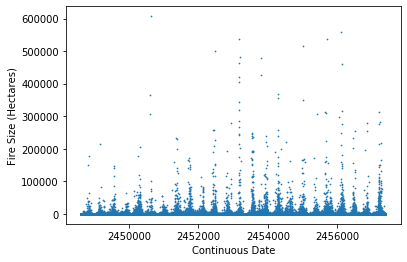

In [152]:
plt.scatter(X[:,1],Y,marker='.',s=2)
plt.ylabel("Fire Size (Hectares)")
plt.xlabel("Continuous Date")
plt.savefig("size_vs_date.png")
plt.show()

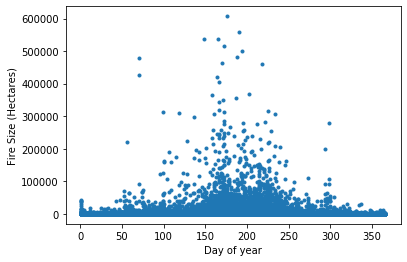

In [149]:
plt.scatter(X[:,2],Y,marker='.')
#plt.title("Fire size vs DOY")
plt.ylabel("Fire Size (Hectares)")
plt.xlabel("Day of year")
plt.savefig("size_vs_doy.png")
plt.show()

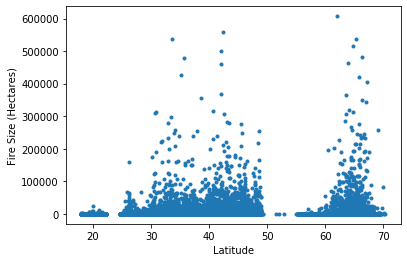

In [153]:
plt.scatter(X[:,4],Y,marker='.')
plt.ylabel("Fire Size (Hectares)")
plt.xlabel("Latitude")
plt.savefig("size_vs_lat.png")
plt.show()

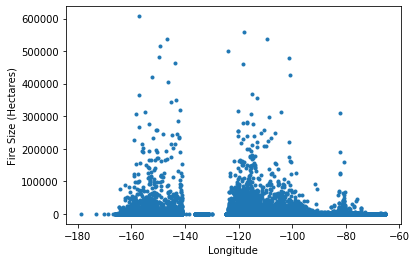

In [154]:
plt.scatter(X[:,5],Y,marker='.')
plt.ylabel("Fire Size (Hectares)")
plt.xlabel("Longitude")
plt.savefig("size_vs_lon.png")
plt.show()

In [125]:
plt.scatter(X[:,5],X[:,4],marker='.')
plt.show()

IndexError: index 6 is out of bounds for axis 1 with size 6

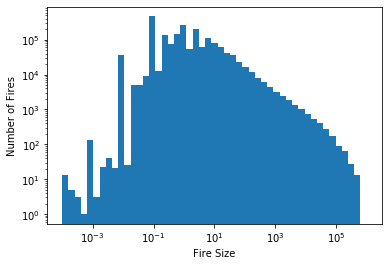

In [166]:
#Distibution of fire size
plt.hist(Y, bins=np.logspace(-4,6, 50));
plt.ylabel('Number of Fires')
plt.xlabel('Fire Size')
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.savefig("kaggle_fires_dist_log.png")
plt.show()

In [126]:
#Normalize the data
sc = StandardScaler()
X_norm = sc.fit_transform(X)

In [187]:
# Shuffles the data before split
# Train/Test split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.05)
print("# Train: {} , #Test: {}".format(X_train.shape[0], X_test.shape[0]))
print("# inputs: {}".format(X_train.shape[1]))
n = X_train.shape[1]

# Train: 1786441 , #Test: 94024
# inputs: 6


Coefficients: [[2236.20671651   -6.11423519    5.9262942    -9.26392475   11.07807721
    -4.39075573]]
MAPE:  82531.18161991793
MAE:  171.11919783424037


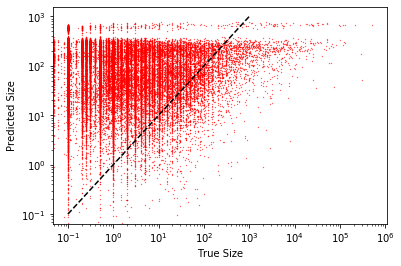

In [188]:
#Testing on all coefficients
reg = LinearRegression().fit(X_train, y_train)
print("Coefficients:", reg.coef_)
lin_pred = reg.predict(X_test)
#Visualize some predictions
plt.scatter(y_test, lin_pred, s=0.3, marker='.', c='r')
plt.xlabel('True Size')
plt.ylabel('Predicted Size')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')
#plt.savefig("fire_predictions.png")
print("MAPE: ",MAPE(y_test,lin_pred))
print("MAE: ",MAE(y_test,lin_pred))

Coefficients: [[11.45951672 -4.42998039]]
MAPE:  79895.11235899932
MAE:  164.9417094178953


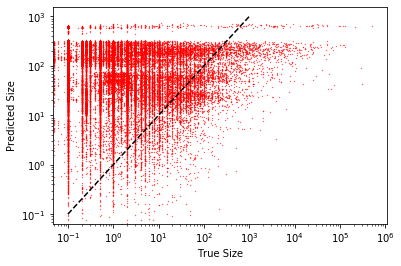

In [189]:
#Testing on just lat/lon
reg = LinearRegression().fit(X_train[:,-2:], y_train)
print("Coefficients:", reg.coef_)
lin_pred = reg.predict(X_test[:,-2:])
#Visualize some predictions
plt.scatter(y_test, lin_pred, s=0.3, marker='.', c='r')
plt.xlabel('True Size')
plt.ylabel('Predicted Size')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')
#plt.savefig("fire_predictions.png")
print("MAPE: ",MAPE(y_test,lin_pred))
print("MAE: ",MAE(y_test,lin_pred))

Coefficients: [[0.16215136]]
MAPE:  45602.31184427982
MAE:  138.48396135347525


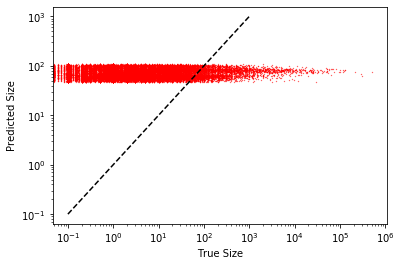

In [196]:
#Testing on just date
reg = LinearRegression().fit(X_train[:,2:3], y_train)
print("Coefficients:", reg.coef_)
lin_pred = reg.predict(X_test[:,2:3])
#Visualize some predictions
plt.scatter(y_test, lin_pred, s=0.3, marker='.', c='r')
plt.xlabel('True Size')
plt.ylabel('Predicted Size')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')
#plt.savefig("fire_predictions.png")
print("MAPE: ",MAPE(y_test,lin_pred))
print("MAE: ",MAE(y_test,lin_pred))

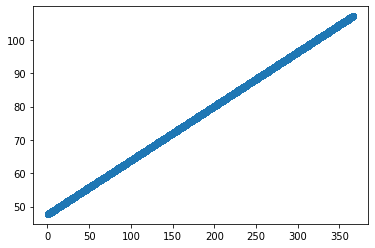

In [197]:
plt.scatter(X_test[:,2],lin_pred)
plt.show()

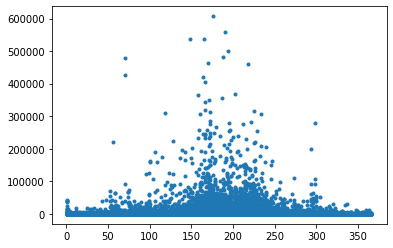

In [201]:
plt.scatter(X_train[:,2], y_train,marker='.')

In [129]:
# Neural network
model = Sequential()
model.add(Dense(32, input_dim=n, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, input_dim=n , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_32 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)              

In [141]:
model.compile(loss='mape', optimizer='adam', metrics=['mse','mae','mape'])

In [142]:
#Save partly trained model
#model.save('partly_trained.h5')

#Load partly trained model
#model = load_model('partly_trained.h5')

#Continue training
history = model.fit(X_train, y_train, epochs=10, batch_size=640, verbose = 2, validation_split = 0.01, shuffle=True)

Train on 1824426 samples, validate on 18429 samples
Epoch 1/10
 - 61s - loss: 84.8778 - mse: 6165762.0000 - mae: 74.2894 - mape: 84.8779 - val_loss: 82.6550 - val_mse: 1521483.6250 - val_mae: 57.1733 - val_mape: 82.6550
Epoch 2/10
 - 61s - loss: 84.1032 - mse: 6165775.0000 - mae: 74.2891 - mape: 84.1032 - val_loss: 82.6615 - val_mse: 1521483.6250 - val_mae: 57.1700 - val_mape: 82.6615
Epoch 3/10
 - 50s - loss: 84.0711 - mse: 6165777.5000 - mae: 74.2860 - mape: 84.0711 - val_loss: 82.7738 - val_mse: 1521483.6250 - val_mae: 57.1683 - val_mape: 82.7738
Epoch 4/10
 - 60s - loss: 83.9540 - mse: 6165773.5000 - mae: 74.2829 - mape: 83.9540 - val_loss: 83.3842 - val_mse: 1521484.2500 - val_mae: 57.1714 - val_mape: 83.3842
Epoch 5/10
 - 57s - loss: 83.9330 - mse: 6165775.0000 - mae: 74.2853 - mape: 83.9330 - val_loss: 82.8590 - val_mse: 1521483.3750 - val_mae: 57.1657 - val_mape: 82.8590
Epoch 6/10
 - 56s - loss: 83.8398 - mse: 6165774.0000 - mae: 74.2772 - mape: 83.8397 - val_loss: 82.1087 - v

In [143]:
#Save partly trained model
#model.save('partly_trained.h5')

#Load partly trained model
#model = load_model('partly_trained.h5')
preds = model.predict(X_test, verbose=1)
_, mse, mae,mape = model.evaluate(X_test, y_test)
print('MSE: %.2f, MAE: %.2f, MAPE: %.2f' % (mse,mae,mape))

37610/37610 [==============================] - 2s 42us/step
MSE: 12329004.00, MAE: 87.29, MAPE: 82.51


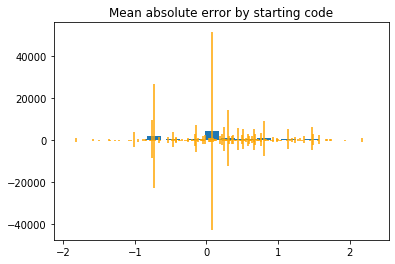

In [144]:
error = np.abs(preds - y_test)
ids = list(set(X_test[:,2]))
errs = np.zeros(len(ids))
count = np.zeros(len(ids))
var = [[] for _ in ids]
for i in range(len(X_test[:,2])):
    index = ids.index(X_test[:,2][i])
    count[index] += 1
    errs[index] += error[i]
    var[index].append(error[i])
err = errs/count
std = [np.std(var[i]) for i in range(len(ids))]
#plt.scatter(X_test[:,2],error,s=1,marker='.')
plt.bar(ids,err,width=.2)
plt.errorbar(ids,err,yerr=std,fmt=' ',color='orange')

plt.title("Mean absolute error by starting code")
plt.show()

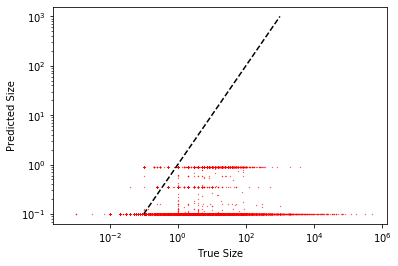

In [145]:
#Visualize some predictions
plt.scatter(y_test, preds, s=0.3, marker='.', c='r')
plt.xlabel('True Size')
plt.ylabel('Predicted Size')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.plot([.1,20,1000],[.1,20,1000],c='k',linestyle='--')
plt.savefig("fire_predictions.png")

In [139]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

KeyError: 'accuracy'

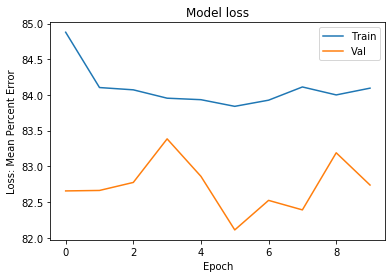

In [146]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss: Mean Percent Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.savefig("mape_loss_train_val.png")

In [147]:
# SVM
from sklearn import svm
from sklearn.metrics import r2_score, mean_absolute_error

n = 10000
svm_reg = svm.SVR(kernel='rbf', degree=deg, gamma='auto')
svm_reg.fit(X_train[0:n,:],y_train[0:n].reshape(-1))

y_pred = svm_reg.predict(X_test[0:n,:])

print("MAE: {}".format(mean_absolute_error(y_test[0:n],y_pred)))
print("r2: {}".format(r2_score(y_test[0:n],y_pred)))
print("---------------------------------------")


NameError: name 'deg' is not defined

In [31]:
# SKlearn MLP
from sklearn.neural_network import MLPRegressor

n = 10000

NN = MLPRegressor(hidden_layer_sizes=(800,800,800,800),max_iter=200
                 )

NN.fit(X_train[0:n,:],y_train[0:n].reshape(-1))
y_pred = NN.predict(X_test[0:n,:])

print("MAE: {}".format(mean_absolute_error(y_test[0:n],y_pred)))
print("r2: {}".format(r2_score(y_test[0:n],y_pred)))
print("---------------------------------------")



MAE: 2.9377906768043127
r2: 0.5936004578504975
---------------------------------------


In [39]:
# K Nearest Neighbours
from sklearn.neighbors import KNeighborsRegressor

n = 10000

for nbs in [3,5,10]:
    for wts in ['distance','uniform']:
        K_nn = KNeighborsRegressor(n_neighbors=nbs,
                                   weights=wts,
                                   n_jobs=6)

        K_nn.fit(X_train[0:n,:],y_train[0:n].reshape(-1))
        y_pred = K_nn.predict(X_test[0:n,:])

        print("nbs: {}, wts: {}".format(nbs, wts))
        print("MAE: {}".format(mean_absolute_error(y_test[0:n],y_pred)))
        print("r2: {}".format(r2_score(y_test[0:n],y_pred)))
        print("---------------------------------------")


nbs: 3, wts: distance
MAE: 2.850458582088001
r2: 0.5466271766560886
---------------------------------------
nbs: 3, wts: uniform
MAE: 2.896626296530333
r2: 0.5412828579215408
---------------------------------------
nbs: 5, wts: distance
MAE: 2.8078940836804565
r2: 0.5739384391773825
---------------------------------------
nbs: 5, wts: uniform
MAE: 2.8843075882324003
r2: 0.5603553094200107
---------------------------------------
nbs: 10, wts: distance
MAE: 2.829045443568786
r2: 0.5784726497971278
---------------------------------------
nbs: 10, wts: uniform
MAE: 2.9426652407788003
r2: 0.5520116486941183
---------------------------------------


In [47]:
# Decision Tree
from sklearn import tree

tree_clf = tree.DecisionTreeRegressor(criterion='mae')

tree_clf.fit(X_train[0:n,:],y_train[0:n].reshape(-1))

y_pred = tree_clf.predict(X_test[0:n,:])

print("MAE: {}".format(mean_absolute_error(y_test[0:n],y_pred)))
print("r2: {}".format(r2_score(y_test[0:n],y_pred)))
print("---------------------------------------")


MAE: 3.0811215912115
r2: 0.37784189558739967
---------------------------------------


In [46]:
# Stacked regressors
from mlxtend.regressor import StackingRegressor

n = 10000

estimators = [K_nn, NN, svm_reg]

regStack = StackingRegressor(regressors=estimators,
                             meta_regressor=NN)

regStack.fit(X_train[0:n,:],y_train[0:n].reshape(-1))

y_pred = regStack.predict(X_test[0:n,:])

print("MAE: {}".format(mean_absolute_error(y_test[0:n],y_pred)))
print("r2: {}".format(r2_score(y_test[0:n],y_pred)))
print("---------------------------------------")


MAE: 2.8222310234315002
r2: 0.5813896406600833
---------------------------------------
